In [ ]:
# Introduction: Detecting Fraudulent Insurance Claims (with focus on Using Mlflow for logging model metrics and performance)

# Insurance fraud is a multi-billion dollar problem that affects both insurance companies and consumers, leading to higher premiums for everyone.
# This project aims to develop a machine learning model to accurately identify potentially fraudulent auto insurance claims.
# By leveraging a dataset of claim information, we can predict which claims are most likely to be fraudulent, allowing for targeted investigation and prevention of financial losses.

# In this notebook, we will:
# 1.  Explore and clean the data to understand its characteristics.
# 2.  Engineer relevant features to improve model performance.
# 3.  Train and evaluate several classification models.
# 4.  Identify the model with the best predictive capability by comparing them using Mlflow tools

In [427]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import mlflow
import mlflow.sklearn

In [428]:
df = pd.read_csv("/mnt/c/users/micha/downloads/insurance_claims/insurance_claims/insurance_claims.csv")

In [ ]:
# Initial Data Exploration
# The dataset contains 40 columns, including both categorical and numerical features.
# Before proceeding, it's crucial to understand the data types, identify missing values, and check for any inconsistencies.
# This will ensure the data is in a suitable format for machine learning algorithms.
# The first few rows give us a glimpse into the structure of the data.

In [429]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [430]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
#Removed some of the columns that were not useful for our purpose

In [431]:
df = df.drop(["_c39","policy_number","policy_bind_date","insured_zip","incident_location"], axis=1)

In [ ]:
#let's check out the number of missing values in our dataset

In [432]:
missing_values = ["?", "N/A", "-", "NULL"]
(df.isin(missing_values)).sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim        

In [1]:
# Am I simply going to remove all those valuable rows only because they have missing values? Yes, Because Our main focus in this project
# is not dealing with the missing values. it is Classification with a focus on using MLflow for logging

In [433]:
df = df[~df.isin(missing_values).any(axis=1)]

In [434]:
(df.isin(missing_values)).sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 0 to 992
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           340 non-null    int64  
 1   age                          340 non-null    int64  
 2   policy_state                 340 non-null    object 
 3   policy_csl                   340 non-null    object 
 4   policy_deductable            340 non-null    int64  
 5   policy_annual_premium        340 non-null    float64
 6   umbrella_limit               340 non-null    int64  
 7   insured_sex                  340 non-null    object 
 8   insured_education_level      340 non-null    object 
 9   insured_occupation           340 non-null    object 
 10  insured_hobbies              340 non-null    object 
 11  insured_relationship         340 non-null    object 
 12  capital-gains                340 non-null    int64  
 13  capital-loss             

In [ ]:
#now we want to investigate our categorical columns
#and see how many unique values each of these columns have

In [436]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")


policy_state: 3 unique values
policy_csl: 3 unique values
insured_sex: 2 unique values
insured_education_level: 7 unique values
insured_occupation: 14 unique values
insured_hobbies: 20 unique values
insured_relationship: 6 unique values
incident_date: 60 unique values
incident_type: 2 unique values
collision_type: 3 unique values
incident_severity: 3 unique values
authorities_contacted: 4 unique values
incident_state: 7 unique values
incident_city: 7 unique values
property_damage: 2 unique values
police_report_available: 2 unique values
auto_make: 14 unique values
auto_model: 39 unique values
fraud_reported: 2 unique values


In [ ]:
#we decided to remove the auto model because of the high number of unique values (High cardinality + likely weak predictive power)

In [437]:
df = df.drop(["auto_model"],axis=1)

In [438]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
5,256,39,OH,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,...,0,2,NO,64100,6410,6410,51280,Saab,2003,Y
8,27,33,IL,100/300,500,1442.99,0,FEMALE,PhD,other-service,...,1,1,YES,27700,2770,2770,22160,Toyota,2012,N
11,447,61,OH,100/300,2000,1137.16,0,FEMALE,High School,exec-managerial,...,1,2,YES,114920,17680,17680,79560,Audi,2006,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,245,40,IL,500/1000,1000,1361.45,0,MALE,PhD,handlers-cleaners,...,0,2,YES,82170,7470,7470,67230,Suburu,1999,N
984,163,36,IN,250/500,1000,1503.21,0,MALE,MD,other-service,...,2,1,NO,51390,5710,11420,34260,Toyota,2013,N
988,295,46,IN,100/300,500,1672.88,0,FEMALE,High School,armed-forces,...,1,1,NO,60700,12140,6070,42490,Honda,1997,N
991,257,44,OH,100/300,1000,1280.88,0,MALE,MD,other-service,...,0,1,NO,46980,0,5220,41760,Accura,2002,N


In [ ]:
# let's explore the correlation between hobbies and fraud.

insured_hobbies
chess             0.800000
cross-fit         0.750000
base-jumping      0.466667
polo              0.461538
board-games       0.400000
video-games       0.333333
reading           0.272727
paintball         0.250000
skydiving         0.250000
sleeping          0.250000
hiking            0.238095
yachting          0.187500
bungie-jumping    0.181818
dancing           0.176471
kayaking          0.157895
basketball        0.133333
movies            0.133333
exercise          0.095238
golf              0.043478
camping           0.000000
Name: fraud_binary, dtype: float64


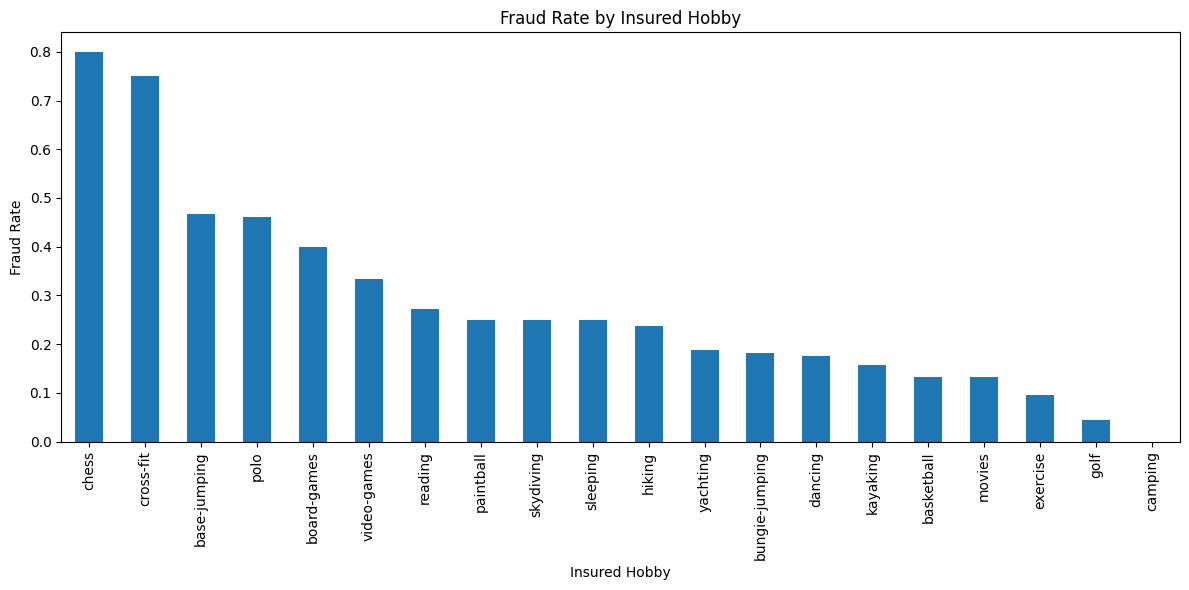

In [439]:
import matplotlib.pyplot as plt
df['fraud_binary'] = df['fraud_reported'].map({'Y': 1, 'N': 0})
fraud_rate_by_hobby = df.groupby('insured_hobbies')['fraud_binary'].mean().sort_values(ascending=False)
print(fraud_rate_by_hobby)

fraud_rate_by_hobby.plot(kind='bar', figsize=(12, 6), title='Fraud Rate by Insured Hobby')
plt.ylabel('Fraud Rate')
plt.xlabel('Insured Hobby')
plt.tight_layout()
plt.show()


In [440]:
 #We got a useful categorical feature here. insured_hobbies does correlate with fraud — especially for some surprisingly risky hobbies (what's going on in that chess club? 😄)

In [ ]:
#let's divide the hobby list into two groups of risky vs not risky hobbies. This simplifies the variable and might help our model generalize better
#from chess to videogames -> risky 
#from reading to camping -> not risky
risky = ['chess', 'cross-fit', 'base-jumping', 'polo','board-games', 'video-games']

In [ ]:
#we added a new column for that

In [441]:
df['hobby_risk'] = df['insured_hobbies'].apply(lambda x: 'risky' if x in risky else 'not_risky')

In [442]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,fraud_binary,hobby_risk
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,2004,Y,1,not_risky
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,NO,34650,7700,3850,23100,Dodge,2007,N,0,risky
5,256,39,OH,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,...,NO,64100,6410,6410,51280,Saab,2003,Y,1,not_risky
8,27,33,IL,100/300,500,1442.99,0,FEMALE,PhD,other-service,...,YES,27700,2770,2770,22160,Toyota,2012,N,0,not_risky
11,447,61,OH,100/300,2000,1137.16,0,FEMALE,High School,exec-managerial,...,YES,114920,17680,17680,79560,Audi,2006,N,0,not_risky


In [ ]:
#now that we have the new column with only two categories (risky-not risky), let's remove the insured_hobbies column.


In [443]:
df = df.drop("insured_hobbies",axis=1)

In [444]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,fraud_binary,hobby_risk
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,2004,Y,1,not_risky
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,NO,34650,7700,3850,23100,Dodge,2007,N,0,risky
5,256,39,OH,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,...,NO,64100,6410,6410,51280,Saab,2003,Y,1,not_risky
8,27,33,IL,100/300,500,1442.99,0,FEMALE,PhD,other-service,...,YES,27700,2770,2770,22160,Toyota,2012,N,0,not_risky
11,447,61,OH,100/300,2000,1137.16,0,FEMALE,High School,exec-managerial,...,YES,114920,17680,17680,79560,Audi,2006,N,0,not_risky


In [ ]:
#let's do the same process. but this time for the insured occupation

insured_occupation
farming-fishing      0.421053
tech-support         0.400000
sales                0.366667
exec-managerial      0.363636
protective-serv      0.333333
transport-moving     0.272727
prof-specialty       0.218750
machine-op-inspct    0.205882
craft-repair         0.192308
armed-forces         0.181818
handlers-cleaners    0.181818
other-service        0.157895
priv-house-serv      0.142857
adm-clerical         0.136364
Name: fraud_binary, dtype: float64


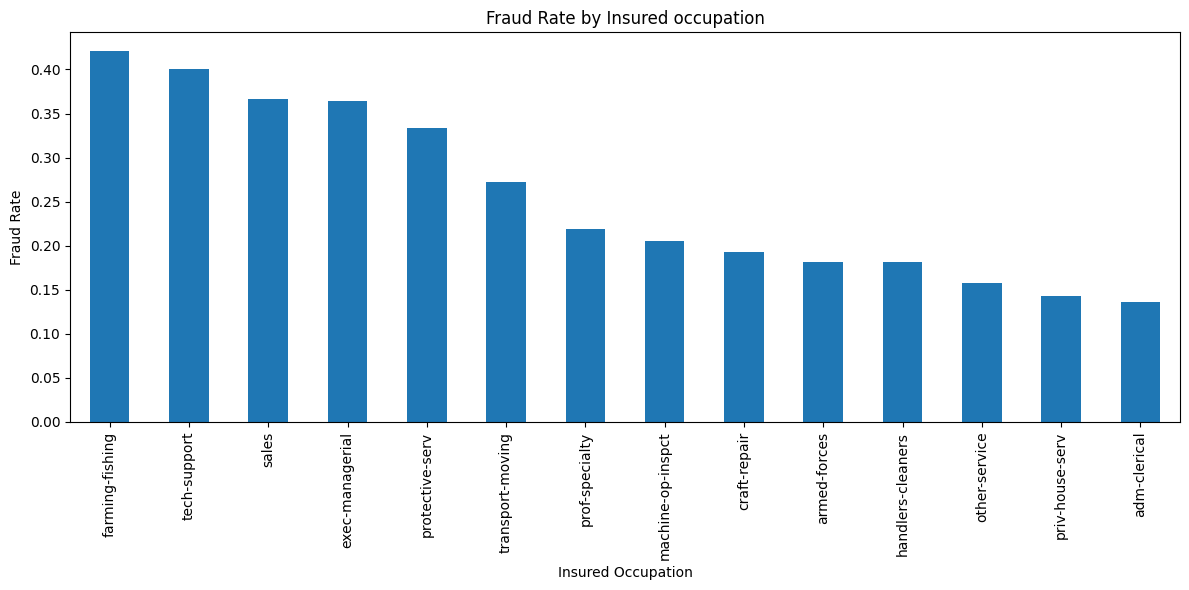

In [445]:
fraud_rate_by_occupation = df.groupby('insured_occupation')['fraud_binary'].mean().sort_values(ascending=False)
print(fraud_rate_by_occupation)

fraud_rate_by_occupation.plot(kind='bar', figsize=(12, 6), title='Fraud Rate by Insured occupation')
plt.ylabel('Fraud Rate')
plt.xlabel('Insured Occupation')
plt.tight_layout()
plt.show()


In [ ]:
#this time instead of listing the high risk jobs (just like what we did for hobbies) we decided to pick a threshold. all jobs with more than 30 percent
#fraud rate will be considered risky.
#PS: this section needs further investigation (the rates look similar, I might consider dropping or simplifying the feature)

In [446]:
risky_occupations=[]
for insured_occupation,fraud_rate in fraud_rate_by_occupation.items():
    if fraud_rate>=0.3:
        risky_occupations.append(insured_occupation)
print(risky_occupations)
        

['farming-fishing', 'tech-support', 'sales', 'exec-managerial', 'protective-serv']


In [447]:
df['occupation_risk'] = df['insured_occupation'].apply(lambda x: 'risky' if x in risky_occupations else 'not_risky')


In [448]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,fraud_binary,hobby_risk,occupation_risk
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,71610,6510,13020,52080,Saab,2004,Y,1,not_risky,not_risky
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,34650,7700,3850,23100,Dodge,2007,N,0,risky,risky
5,256,39,OH,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,...,64100,6410,6410,51280,Saab,2003,Y,1,not_risky,risky
8,27,33,IL,100/300,500,1442.99,0,FEMALE,PhD,other-service,...,27700,2770,2770,22160,Toyota,2012,N,0,not_risky,not_risky
11,447,61,OH,100/300,2000,1137.16,0,FEMALE,High School,exec-managerial,...,114920,17680,17680,79560,Audi,2006,N,0,not_risky,risky


In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 0 to 992
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           340 non-null    int64  
 1   age                          340 non-null    int64  
 2   policy_state                 340 non-null    object 
 3   policy_csl                   340 non-null    object 
 4   policy_deductable            340 non-null    int64  
 5   policy_annual_premium        340 non-null    float64
 6   umbrella_limit               340 non-null    int64  
 7   insured_sex                  340 non-null    object 
 8   insured_education_level      340 non-null    object 
 9   insured_occupation           340 non-null    object 
 10  insured_relationship         340 non-null    object 
 11  capital-gains                340 non-null    int64  
 12  capital-loss                 340 non-null    int64  
 13  incident_date            

In [ ]:
#dropping some columns that are not going to be useful anymore

In [450]:
df = df.drop(["incident_date","insured_occupation"],axis=1)

In [451]:
df = df.drop("fraud_reported",axis=1)

In [ ]:
#grouping the columns into two lists of numerical and cactegorical for future easy access

In [452]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

In [453]:
print(cat_cols)

['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'hobby_risk', 'occupation_risk']


In [ ]:
#investigating the unique values in some of the categorical columns

In [454]:
df["incident_severity"].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss'], dtype=object)

In [455]:
df["insured_education_level"].unique()

array(['MD', 'PhD', 'High School', 'College', 'Masters', 'JD',
       'Associate'], dtype=object)

In [456]:
df["property_damage"].unique()

array(['YES', 'NO'], dtype=object)

In [457]:
df[cat_cols]

,policy_state,policy_csl,insured_sex,insured_education_level,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,hobby_risk,occupation_risk
0,OH,250/500,MALE,MD,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,not_risky,not_risky
2,OH,100/300,FEMALE,PhD,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,risky,risky
5,OH,250/500,FEMALE,PhD,unmarried,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,NO,NO,Saab,not_risky,risky
8,IL,100/300,FEMALE,PhD,own-child,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,NO,YES,Toyota,not_risky,not_risky
11,OH,100/300,FEMALE,High School,other-relative,Multi-vehicle Collision,Front Collision,Major Damage,Fire,SC,Springfield,YES,YES,Audi,not_risky,risky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,IL,500/1000,MALE,PhD,unmarried,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,OH,Northbend,YES,YES,Suburu,not_risky,not_risky
984,IN,250/500,MALE,MD,husband,Single Vehicle Collision,Side Collision,Total Loss,Ambulance,WV,Springfield,YES,NO,Toyota,risky,not_risky
988,IN,100/300,FEMALE,High School,wife,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,NY,Columbus,YES,NO,Honda,not_risky,not_risky
991,OH,100/300,MALE,MD,other-relative,Single Vehicle Collision,Rear Collision,Total Loss,Other,WV,Riverwood,NO,NO,Accura,not_risky,not_risky


In [ ]:
#grouping the categorical columns into two groups of nominal and ordinal for future easy access

In [458]:
nominal_columns = [item for item in cat_cols if item not in ['insured_education_level', 'incident_severity']]
ordinal_columns = ['insured_education_level', 'incident_severity']


In [ ]:
#The following code takes the categorical (text-based) columns in my data and converts them into a numerical format that machine learning models can understand. 
#It does this using a technique called "one-hot encoding." The result is a new table that represents the categorical data in a numerical way.

In [459]:
onehot = OneHotEncoder(drop='first', sparse_output=False)  
nominal_data = df[nominal_columns]
encoded_nominal = onehot.fit_transform(nominal_data)
encoded_nominal_df = pd.DataFrame(
    encoded_nominal,
    columns=onehot.get_feature_names_out(nominal_columns),
    index=df.index
)
encoded_nominal_df

,policy_state_IN,policy_state_OH,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,...,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,hobby_risk_risky,occupation_risk_risky
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
984,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
988,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
991,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Let's deal with the ordinal columns. The text-based columns whose values have an order.
#We need to turn them into numbers so that the machine learning algorithms deal better with them

In [460]:
education_order = {
    'High School': 0,
    'Associate': 1,
    'College': 2,
    'Masters': 3,
    'JD': 4,
    'MD': 5,
    'PhD': 6
}

# We Defined mapping for incident severity
severity_order = {
    'Minor Damage': 0,
    'Major Damage': 1,
    'Total Loss': 2
    }


df['insured_education_level_encoded'] = df['insured_education_level'].map(education_order)
df['incident_severity_encoded'] = df['incident_severity'].map(severity_order)


In [461]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_relationship,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_binary,hobby_risk,occupation_risk,insured_education_level_encoded,incident_severity_encoded
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,husband,...,6510,13020,52080,Saab,2004,1,not_risky,not_risky,5,1
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,own-child,...,7700,3850,23100,Dodge,2007,0,risky,risky,6,0
5,256,39,OH,250/500,1000,1351.10,0,FEMALE,PhD,unmarried,...,6410,6410,51280,Saab,2003,1,not_risky,risky,6,1
8,27,33,IL,100/300,500,1442.99,0,FEMALE,PhD,own-child,...,2770,2770,22160,Toyota,2012,0,not_risky,not_risky,6,2
11,447,61,OH,100/300,2000,1137.16,0,FEMALE,High School,other-relative,...,17680,17680,79560,Audi,2006,0,not_risky,risky,0,1


In [ ]:
#from here all i do is to get rid of the original unuseful columns and glue all the new processed columns and getting them ready for the ML

In [462]:
df_combined = df.drop(columns=nominal_columns)  # drop original columns



In [463]:
df_combined

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_binary,insured_education_level_encoded,incident_severity_encoded
0,328,48,1000,1406.91,0,MD,53300,0,Major Damage,5,...,1,2,71610,6510,13020,52080,2004,1,5,1
2,134,29,2000,1413.14,5000000,PhD,35100,0,Minor Damage,7,...,2,3,34650,7700,3850,23100,2007,0,6,0
5,256,39,1000,1351.10,0,PhD,0,0,Major Damage,19,...,0,2,64100,6410,6410,51280,2003,1,6,1
8,27,33,500,1442.99,0,PhD,0,0,Total Loss,21,...,1,1,27700,2770,2770,22160,2012,0,6,2
11,447,61,2000,1137.16,0,High School,0,-51000,Major Damage,21,...,1,2,114920,17680,17680,79560,2006,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,245,40,1000,1361.45,0,PhD,39300,0,Minor Damage,12,...,0,2,82170,7470,7470,67230,1999,0,6,0
984,163,36,1000,1503.21,0,MD,55700,-49900,Total Loss,1,...,2,1,51390,5710,11420,34260,2013,0,5,2
988,295,46,500,1672.88,0,High School,0,0,Minor Damage,5,...,1,1,60700,12140,6070,42490,1997,0,0,0
991,257,44,1000,1280.88,0,MD,59400,-32200,Total Loss,21,...,0,1,46980,0,5220,41760,2002,0,5,2


In [464]:
df_combined = df_combined.join(encoded_nominal_df)    # join encoded columns

In [465]:
df_combined = df_combined.drop(["insured_education_level", "incident_severity"],axis=1)

In [466]:
df_combined

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,hobby_risk_risky,occupation_risk_risky
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,256,39,1000,1351.10,0,0,0,19,3,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,27,33,500,1442.99,0,0,0,21,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,447,61,2000,1137.16,0,0,-51000,21,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,245,40,1000,1361.45,0,39300,0,12,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
984,163,36,1000,1503.21,0,55700,-49900,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
988,295,46,500,1672.88,0,0,0,5,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
991,257,44,1000,1280.88,0,59400,-32200,21,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [467]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 0 to 992
Data columns (total 64 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      340 non-null    int64  
 1   age                                     340 non-null    int64  
 2   policy_deductable                       340 non-null    int64  
 3   policy_annual_premium                   340 non-null    float64
 4   umbrella_limit                          340 non-null    int64  
 5   capital-gains                           340 non-null    int64  
 6   capital-loss                            340 non-null    int64  
 7   incident_hour_of_the_day                340 non-null    int64  
 8   number_of_vehicles_involved             340 non-null    int64  
 9   bodily_injuries                         340 non-null    int64  
 10  witnesses                               340 non-null    int64  
 11

In [468]:
num_cols

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'fraud_binary']

In [469]:
df_combined

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,hobby_risk_risky,occupation_risk_risky
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,256,39,1000,1351.10,0,0,0,19,3,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,27,33,500,1442.99,0,0,0,21,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,447,61,2000,1137.16,0,0,-51000,21,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,245,40,1000,1361.45,0,39300,0,12,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
984,163,36,1000,1503.21,0,55700,-49900,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
988,295,46,500,1672.88,0,0,0,5,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
991,257,44,1000,1280.88,0,59400,-32200,21,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#let's start using mlflow and do some machine learning

In [472]:
from sklearn.model_selection import train_test_split

In [473]:
from sklearn.preprocessing import StandardScaler

In [474]:
y = df_combined['fraud_binary']
X = df_combined.drop(columns=['fraud_binary'])

In [ ]:
# An investigation into which numerical numbers need scaling

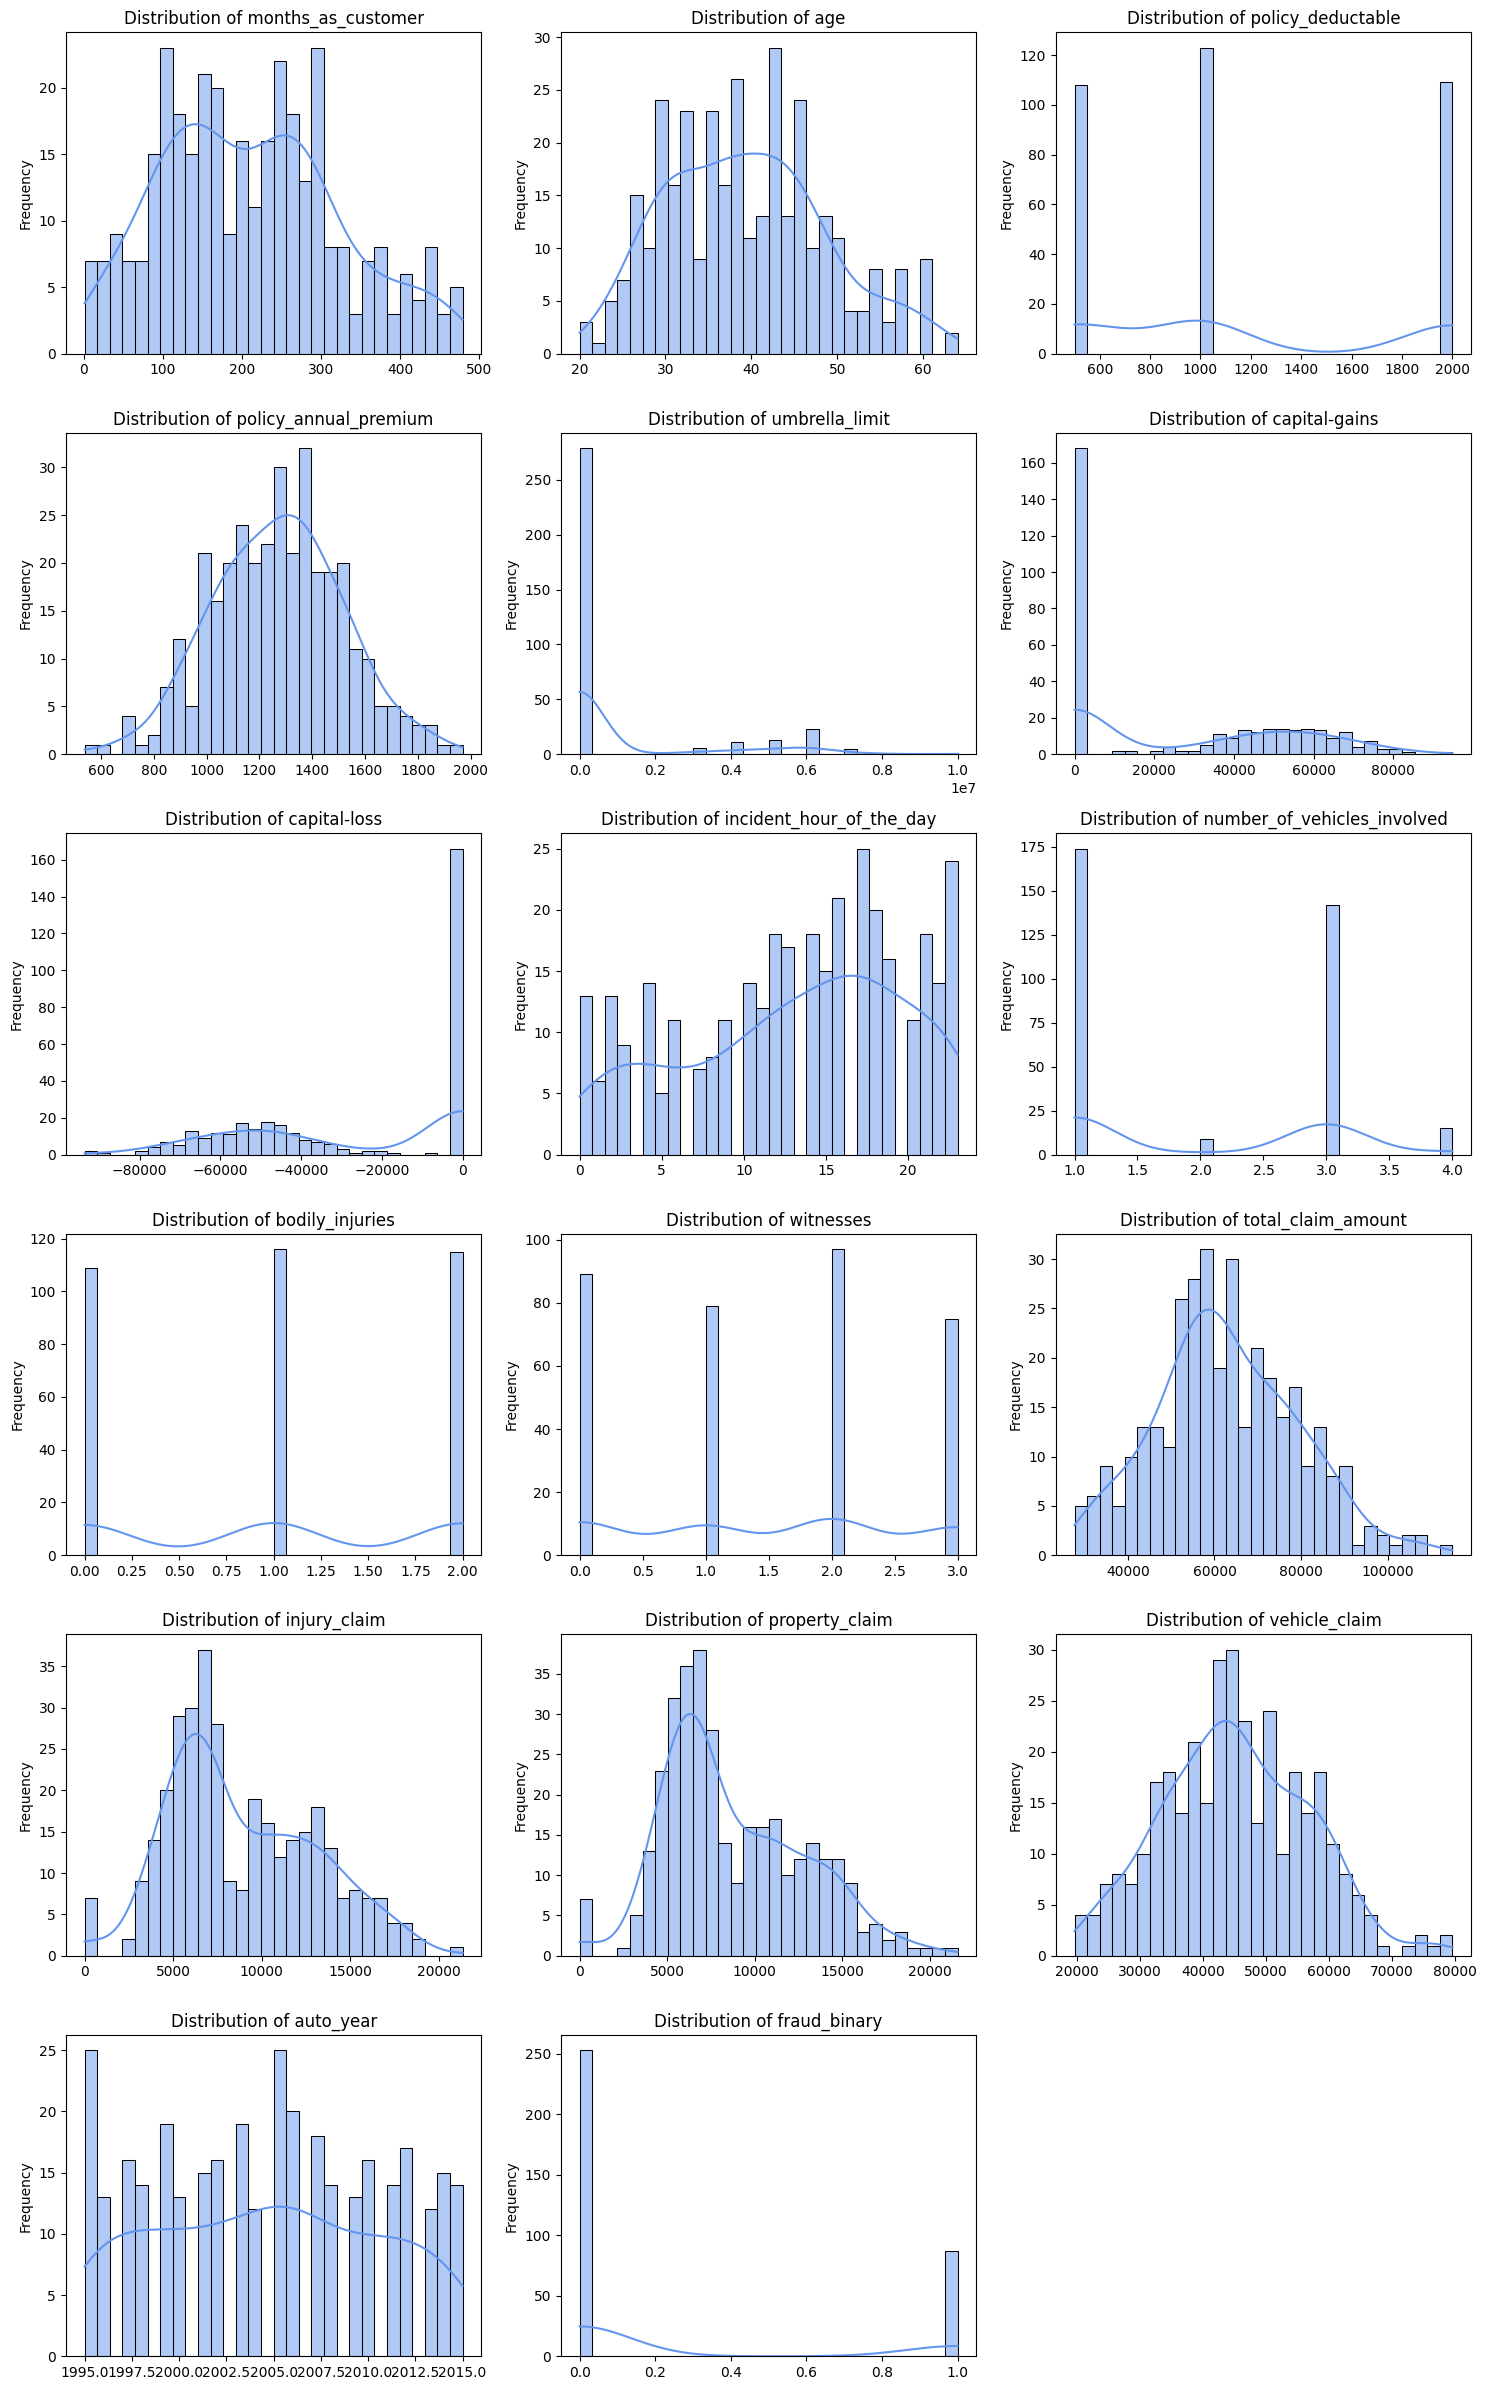

In [475]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the grid
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))

# Flatten the axes array
axes = axes.flatten()

# Loop through num_cols and plot
for i, col in enumerate(num_cols):
    sns.histplot(df_combined[col], ax=axes[i], kde=True, bins=30, color='cornflowerblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Turn off unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
#after seeing the plots the columns are selected

In [476]:
ct = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['months_as_customer', 'age','policy_annual_premium','umbrella_limit','capital-gains',
                                   'capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim',
                                   'auto_year'])        # scale numeric
        
    ],
    remainder='passthrough'  # or 'passthrough' to keep untouched columns
)


In [477]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#defining the models for the pipeline
#we used Logistic Regression - Random Forest and the beautiful XGBoost

In [478]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=400),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss')
}

In [479]:
from sklearn.pipeline import Pipeline

In [480]:
from sklearn.metrics import classification_report

In [ ]:
#creating the pipeline- training the model - evaluating them and logging the result into MLflow

In [481]:
def log_model(model_name, model, X_train, y_train, X_test, y_test):
    mlflow.set_experiment("My Experiment") #it's just the name for mlflow to be able to track it easier
    with mlflow.start_run():
        
        mlflow.log_param("model", model_name) # let's Log the model parameters

        # now create the pipeline with the column transformer and classifier
        pipeline = Pipeline([
            ('preprocessor', ct),    # Apply preprocessing (scaling) to the data
            ('classifier', model)     # The classifier model
        ])

        
        pipeline.fit(X_train, y_train) # Training

        
        y_pred = pipeline.predict(X_test) #Evaluating the model
        #accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        # Log the output metrics like accuracy, f1 score macro, recall for class 0 and recall for class 1
        mlflow.log_metrics({
            'accuracy': report['accuracy'],
            'recall_class_0': report['0']['recall'],
            'recall_class_1': report['1']['recall'],
            'f1_score_macro': report['macro avg']['f1-score']
        })

        
        mlflow.sklearn.log_model(pipeline, "model", input_example=X_test[:1]) # also need to log the model too
        
        

In [ ]:
#split the data set into 70/30 - training the models and logging them each

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train and log each model
for model_name, model in models.items():
    log_model(model_name, model, X_train, y_train, X_test, y_test)

/home/loonycorn/mlflow/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/loonycorn/mlflow/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing valu

In [ ]:
#here is the result I saved as a photo captured from Mlflow

In [4]:
from IPython.display import HTML

HTML('<img src="F.jpg" width="800">')